In [2]:
import pandas as pd

# read data
df = pd.read_csv('data/multiTimeline.csv')
df

,Month,Interest
0,2004-01,0
1,2004-02,4
2,2004-03,3
3,2004-04,3
4,2004-05,1
...,...,...
225,2022-10,90
226,2022-11,93
227,2022-12,75
228,2023-01,81


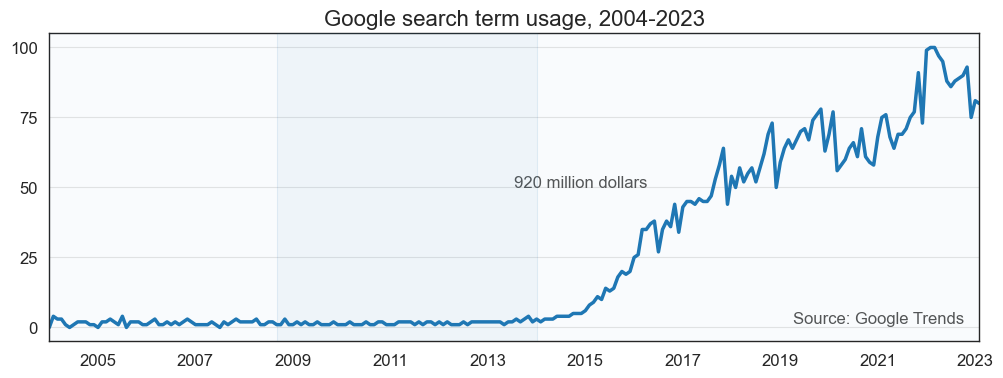

In [129]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='white', context='paper', rc={'figure.figsize':(12, 4)})

# plot a time series with Interest as the y-axis and x-axis in years
df.plot(x='Month', y='Interest', color='tab:blue', linewidth=2.5, zorder=1)

# add source annotation in bottom right corner
plt.annotate('Source: Google Trends', xy=(0.8, 0.06), xycoords='axes fraction', fontsize=12, color='#555555', zorder=2)

# add source annotation in bottom right corner
plt.annotate('920 million dollars', xy=(0.5, 0.5), xycoords='axes fraction', fontsize=12, color='#555555')

# shade the plot post-GFC in red, and make it behind the plot
plt.axvspan('2004-01-01', '2008-09-01', color='tab:blue', alpha=0.025, zorder=3)

# shade the plot post-GFC in red, and make it behind the plot
plt.axvspan('2008-09-01', '2014-01-01', color='tab:blue', alpha=0.075, zorder=3)

# shade the plot post-GFC in red, and make it behind the plot
plt.axvspan('2014-01-01', '2023-02-01', color='tab:blue', alpha=0.025, zorder=3)


plt.xlabel('')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_axisbelow(True)
plt.yticks(np.arange(0, 110, 25), fontsize=12)
plt.xticks(fontsize=12)

plt.title('Google search term usage, 2004-2023', fontsize=16)
plt.legend().remove()
plt.show()

# Numbers represent search interest relative to the highest point on the chart for the given region and time. 
# A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. 
# A score of 0 means that there was not enough data for this term."

<AxesSubplot: xlabel='Month'>

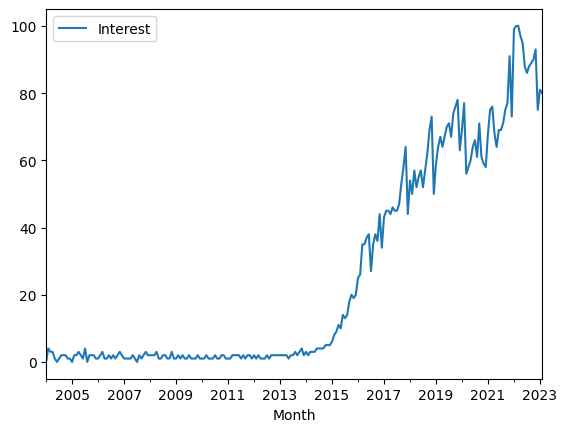

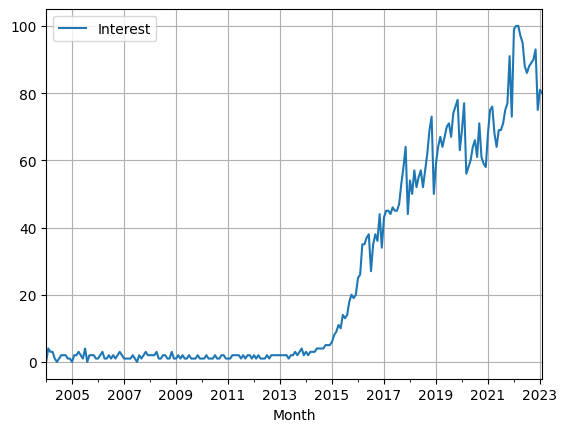

In [7]:
# plot a time series with Interest as the y-axis and x-axis in years
df['Month'] = pd.to_datetime(df['Month'])
df.plot(x='Month', y='Interest')

# add y-axis grid
df.plot(x='Month', y='Interest', grid=True)

### IMDB data

In [9]:
import pandas as pd

# read data file with .tsv extension
imdb_df = pd.read_csv('data/name.basics.tsv', sep='\t')

# fix UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 1: invalid continuation byte
acde_df = pd.read_csv('data/dataviz_position_task_dataset.csv', encoding='latin-1')

In [14]:
imdb_df.columns

Index(['nconst', 'primaryName', 'birthYear', 'deathYear', 'primaryProfession',
       'knownForTitles'],
      dtype='object')

In [26]:
x = 'Chris Edwards'

# get the first name
x.split(' ')[0]

# get the last name
x.split(' ')[-1]

len(x.split(' '))

2

In [40]:
x.strip().replace('  ',' ')

'Bill Onus'

In [68]:
count = 0

for x,y in zip(acde_df['display_name_ausstage'], acde_df['same_name']):
    if count % 20 == 0: print(count)
    count += 1
    x = x.strip().replace('  ',' ')
    y = y.strip().replace('  ',' ')

    if (len(x.split(' ')) == 2) | (len(y.split(' ')) == 2):
        count += 1
        try: 
            this_person = imdb_df[(imdb_df['primaryName'].str.contains(x.split(' ')[0],na=False)) & \
            (imdb_df['primaryName'].str.contains(x.split(' ')[-1],na=False))]
        except:
            this_person = imdb_df[(imdb_df['primaryName'].str.contains(y.split(' ')[0],na=False)) & \
            (imdb_df['primaryName'].str.contains(y.split(' ')[-1],na=False))]
        
        acde_df.loc[acde_df['display_name_ausstage'] == x, 'number_matches'] = this_person.shape[0]
        
    elif (x == 'Tori de Mestre') | (x == 'Ian de Gruchy'):
            this_person = imdb_df[(imdb_df['primaryName'].str.contains(x.split(' ')[0],na=False)) & \
            (imdb_df['primaryName'].str.contains(' '.join(x.split(' ')[-2:]),na=False))]
    elif (x == 'Del Kathryn Barton'):
            this_person = imdb_df[(imdb_df['primaryName'].str.contains(' '.join(x.split(' ')[0:2]))) & \
            (imdb_df['primaryName'].str.contains(x.split(' ')[-1],na=False))]
    elif (x == 'Freddy Jangala Patrick'):
            this_person = imdb_df[(imdb_df['primaryName'].str.contains(x.split(' ')[0],na=False)) & \
            (imdb_df['primaryName'].str.contains(x.split(' ')[1],na=False)) & \
            (imdb_df['primaryName'].str.contains(x.split(' ')[2],na=False))]
    else:
        print(x,y)
        pass

0
20
40
60
80
100
120
140
160
180
200
220
240
380
400
420
440
460
480
700
720
740
760
780


In [70]:
# write to csv
acde_df.to_csv('data/ausstage_march_symp.csv', index=False)

In [69]:
acde_df.shape

(401, 26)

In [ ]:
# imdb scraping steps

# 1. get name and corresponding movies and search for movie by id
# example: https://www.imdb.com/title/tt0203009

# 2. get metadata such as details, awards, 
# rating: title.ratings.tsv.gz
# genre: title.basics.tsv.gz
# region: title.akas.tsv.gz
# language: title.akas.tsv.gz

In [58]:
acde_df[acde_df['same_name'] == 'Freddy Jangala Patrick']
imdb_df[(imdb_df['primaryName'].str.contains('Chris Edwards-Haines',na=False))]

,same_name,display_name_ausstage,first_name_ausstage,first_name_daao,middle_name_ausstage,last_name_ausstage,last_name_daao,gender_ausstage,gender_daao,year_of_birth_ausstage,...,nationality_ausstage,other_names_ausstage,other_names_daao,all_names_daao,all_names_indiv_ausstage,all_names_unf_ausstage,ori_id_ausstage,ori_id_daao,ori_id_unf_ausstage,number_matches
241,Freddy Jangala Patrick,Freddy Jangala Patrick,Freddy,Freddy Jangala,NaN,Jangala Patrick,Patrick,Male,Male,NaN,...,NaN,[],"[('', 'Kumunjayi')]","['Kumunjayi', 'Freddy Jangala Patrick']",['Freddy Jangala Patrick'],['Freddy Jangala Patrick'],524797,4da19e7fb538b73d930155e2,147007,NaN
